<div style="background-color: #1a1a2e; padding: 25px; border-radius: 12px; border: 1px solid #16213e; max-width: 850px; margin: auto; text-align: center;">
    <h2 style="font-family: 'Helvetica Neue', Arial, sans-serif; color: #e94560; font-size: 32px; margin-bottom: 12px; font-weight: bold;">
        Predictive Maintenance for Milling Machine
    </h2>
    <p style="font-family: 'Roboto', sans-serif; color: #c4c4c4; font-size: 18px; margin-top: 10px;">
        Optimize Machine Performance and prevent downtime with our Predictive Maintenance Solution.
    </p>
</div>

#### Dataset from Kaggle: https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020/data

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import scipy.stats as stats

In [2]:
df = pd.read_csv('Data/ai4i2020.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
#dropping UDI and Product Id
df.drop(['Product ID', 'UDI'], axis=1, inplace=True)

In [6]:
df.head(3)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0

In [7]:
df_numeric_cols = df.select_dtypes(include=[np.number])
df_numeric_cols.describe().T

count        mean         std     min     25%  \
Air temperature [K]      10000.0   300.00493    2.000259   295.3   298.3   
Process temperature [K]  10000.0   310.00556    1.483734   305.7   308.8   
Rotational speed [rpm]   10000.0  1538.77610  179.284096  1168.0  1423.0   
Torque [Nm]              10000.0    39.98691    9.968934     3.8    33.2   
Tool wear [min]          10000.0   107.95100   63.654147     0.0    53.0   
Machine failure          10000.0     0.03390    0.180981     0.0     0.0   
TWF                      10000.0     0.00460    0.067671     0.0     0.0   
HDF                      10000.0     0.01150    0.106625     0.0     0.0   
PWF                      10000.0     0.00950    0.097009     0.0     0.0   
OSF                      10000.0     0.00980    0.098514     0.0     0.0   
RNF                      10000.0     0.00190    0.043550     0.0     0.0   

                            50%     75%     max  
Air temperature [K]       300.1   301.5   304.5  
Process temperature [K]   310.1   311.1   313.8  
Rotational speed [rpm]   1503.0  1612.0  2886.0  
Torque [Nm]                40.1    46.8    76.6  
Tool wear [min]           108.0   162.0   253.0  
Machine failure             0.0     0.0     1.0  
TWF                         0.0     0.0     1.0  
HDF                         0.0     0.0     1.0  
PWF                         0.0     0.0     1.0  
OSF                         0.0     0.0     1.0  
RNF                         0.0     0.0     1.0

In [8]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

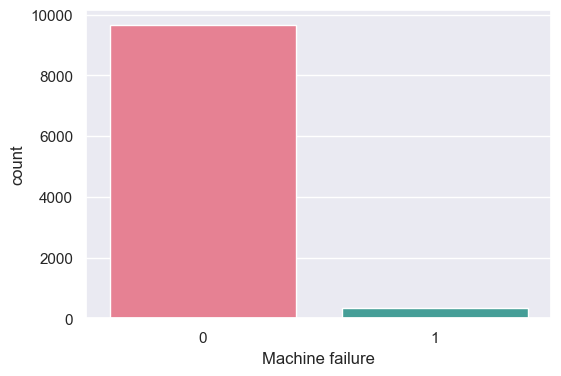

In [9]:
sns.set(rc={'figure.figsize':(6,4)})
palette = sns.color_palette("husl", len(df['Machine failure'].unique()))
sns.countplot(x='Machine failure', data=df, hue='Machine failure', palette=palette,legend=False)
plt.show()

### Visualizing Data Distributions

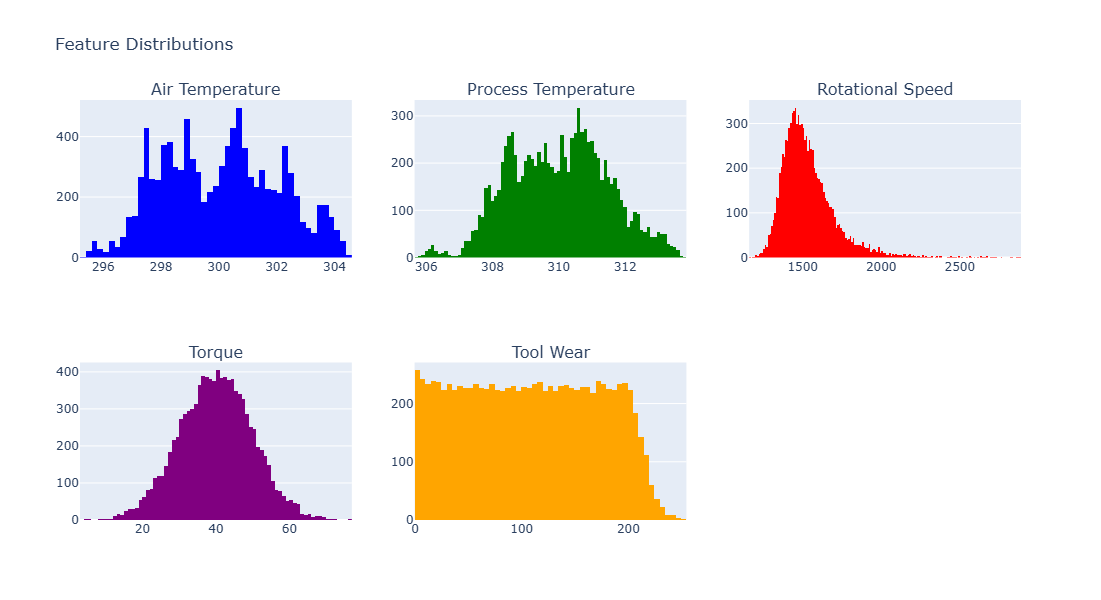

In [10]:
# Creating a 2x3 grid of subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=("Air Temperature", "Process Temperature", 
                                                    "Rotational Speed", "Torque", "Tool Wear"))

# Adding histograms to the subplots
fig.add_trace(go.Histogram(x=df['Air temperature [K]'], name='Air Temperature', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Process temperature [K]'], name='Process Temperature', marker_color='green'), row=1, col=2)
fig.add_trace(go.Histogram(x=df['Rotational speed [rpm]'], name='Rotational Speed', marker_color='red'), row=1, col=3)
fig.add_trace(go.Histogram(x=df['Torque [Nm]'], name='Torque', marker_color='purple'), row=2, col=1)
fig.add_trace(go.Histogram(x=df['Tool wear [min]'], name='Tool Wear', marker_color='orange'), row=2, col=2)

fig.update_layout(height=600, width=1000, title_text="Feature Distributions", showlegend=False)
fig.show()

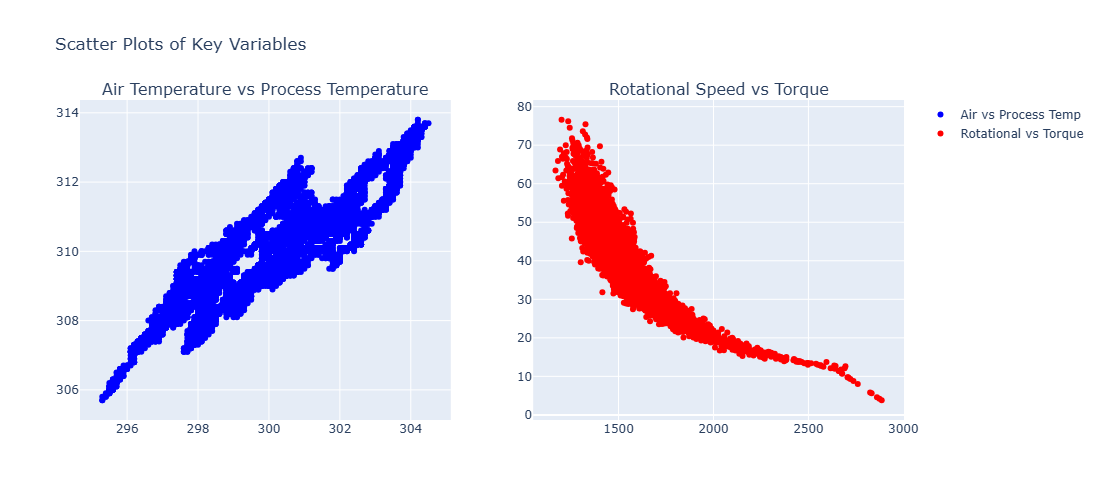

In [11]:
# Creating a 1x2 grid of subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Air Temperature vs Process Temperature", 
                                                    "Rotational Speed vs Torque"))

# Scatter plot for Air Temperature vs Process Temperature
fig.add_trace(go.Scatter(x=df['Air temperature [K]'], y=df['Process temperature [K]'], 
                         mode='markers', marker=dict(color='blue'), name='Air vs Process Temp'), 
              row=1, col=1)

# Scatter plot for Rotational Speed vs Torque
fig.add_trace(go.Scatter(x=df['Rotational speed [rpm]'], y=df['Torque [Nm]'], 
                         mode='markers', marker=dict(color='red'), name='Rotational vs Torque'), 
              row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Scatter Plots of Key Variables")
fig.show()

* Air vs Process Temperature: Strong, Positive Correlation
* Rotational Speed vs Torque: Negative Relationship
  > These relationships are key indicators of machine behavior and could help in predictive maintenance.

Text(0.5, 1.0, 'Number of failure types per record')

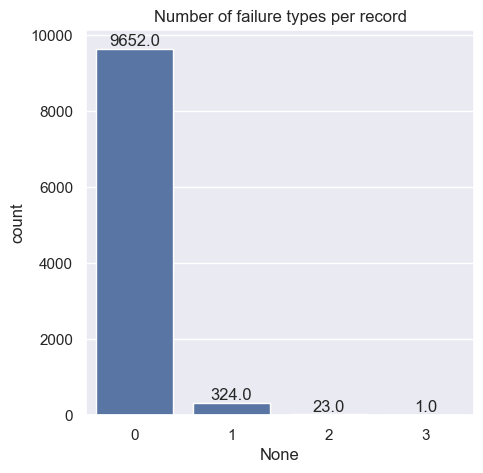

In [12]:
df_failure_types = df.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = df_failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of failure types per record')

### Feature Engineering

In [13]:
df['Power'] = df[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)

In [14]:
df['Temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']

In [15]:
df['tool_wear_torque_product'] = df[['Tool wear [min]', 'Torque [Nm]']].product(axis=1)
df.head(2)

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         42.8                0                0    0    0    0    0    0   
1         46.3                3                0    0    0    0    0    0   

     Power  Temp_diff  tool_wear_torque_product  
0  66382.8       10.5                       0.0  
1  65190.4       10.5                     138.9

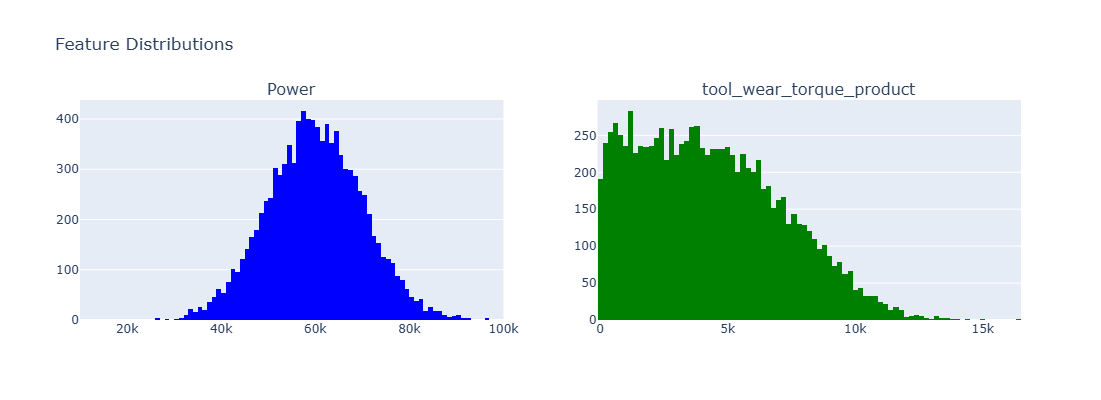

In [16]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Power", "tool_wear_torque_product"))

# Adding histograms to the subplots
fig.add_trace(go.Histogram(x=df['Power'], name='Power', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['tool_wear_torque_product'], name='tool_wear_torque_product', marker_color='green'), row=1, col=2)

fig.update_layout(height=400, width=1000, title_text="Feature Distributions", showlegend=False)
fig.show()

In [17]:
df[['Power', 'tool_wear_torque_product', 'Temp_diff']].describe()

Power  tool_wear_torque_product     Temp_diff
count  10000.000000              10000.000000  10000.000000
mean   59967.147040               4314.664550     10.000630
std    10193.093881               2826.567692      1.001094
min    10966.800000                  0.000000      7.600000
25%    53105.400000               1963.650000      9.300000
50%    59883.900000               4012.950000      9.800000
75%    66873.750000               6279.000000     11.000000
max    99980.400000              16497.000000     12.100000

In [18]:
correlation_matrix = df[['Power', 'tool_wear_torque_product', 'Temp_diff' ,'Machine failure']].corr()
correlation_matrix

Power  tool_wear_torque_product  Temp_diff  \
Power                     1.000000                  0.368842   0.006694   
tool_wear_torque_product  0.368842                  1.000000  -0.005051   
Temp_diff                 0.006694                 -0.005051   1.000000   
Machine failure           0.176039                  0.190427  -0.111676   

                          Machine failure  
Power                            0.176039  
tool_wear_torque_product         0.190427  
Temp_diff                       -0.111676  
Machine failure                  1.000000

### Power Analysis:

#### Failures Due to Power: Analyzing how many failures occur when the Power is below 3500 W or above 9000 W.

In [19]:
power_failure_counts = df[(df['Power'] < 3500) | (df['Power'] > 9000) & (df['Machine failure'] == 1)]
print("Power Failures Count:", len(power_failure_counts))

Power Failures Count: 339


### Tool Wear and Torque Analysis:

#### Failures Due to Tool Wear and Torque: Analyzing how many failures occur based on the calculated tool_wear_torque_product and its relation to the failure modes.

In [20]:
tool_wear_failure_counts_L = df[(df['tool_wear_torque_product'] > 11000) & (df['Type'] == 'L') & (df['Machine failure'] == 1)]
print("Tool Wear Failures Count for L Type:", len(tool_wear_failure_counts_L))

tool_wear_failure_counts_M = df[(df['tool_wear_torque_product'] > 12000) & (df['Type'] == 'M') & (df['Machine failure'] == 1)]
print("Tool Wear Failures Count for M Type:", len(tool_wear_failure_counts_M))

tool_wear_failure_counts_H = df[(df['tool_wear_torque_product'] > 13000) & (df['Type'] == 'H') & (df['Machine failure'] == 1)]
print("Tool Wear Failures Count for H Type:", len(tool_wear_failure_counts_H))

Tool Wear Failures Count for L Type: 87
Tool Wear Failures Count for M Type: 9
Tool Wear Failures Count for H Type: 2


In [21]:
heat_dissipation_failure = df[(df['Temp_diff'] < 8.6) & (df['Rotational speed [rpm]'] < 1380) & (df['Machine failure'] == 1)]
print("Heat Dissipation Failures Count:", len(heat_dissipation_failure))

Heat Dissipation Failures Count: 115


### Categorial encoding

In [22]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['L', 'M', 'H']])
df['Type'] = oe.fit_transform(df[['Type']]).astype(int)

df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     0                298.2                    308.7                    1408   
2     0                298.1                    308.5                    1498   
3     0                298.2                    308.6                    1433   
4     0                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0         42.8                0                0    0    0    0    0    0   
1         46.3                3                0    0    0    0    0    0   
2         49.4                5                0    0    0    0    0    0   
3         39.5                7                0    0    0    0    0    0   
4         40.0                9                0    0    0    0    0    0   

     Power  Temp_diff  tool_wear_torque_product  
0  66382.8       10.5                       0.0  
1  65190.4       10.5                     138.9  
2  74001.2       10.4                     247.0  
3  56603.5       10.4                     276.5  
4  56320.0       10.5                     360.0

### Checking for Multicollinearity

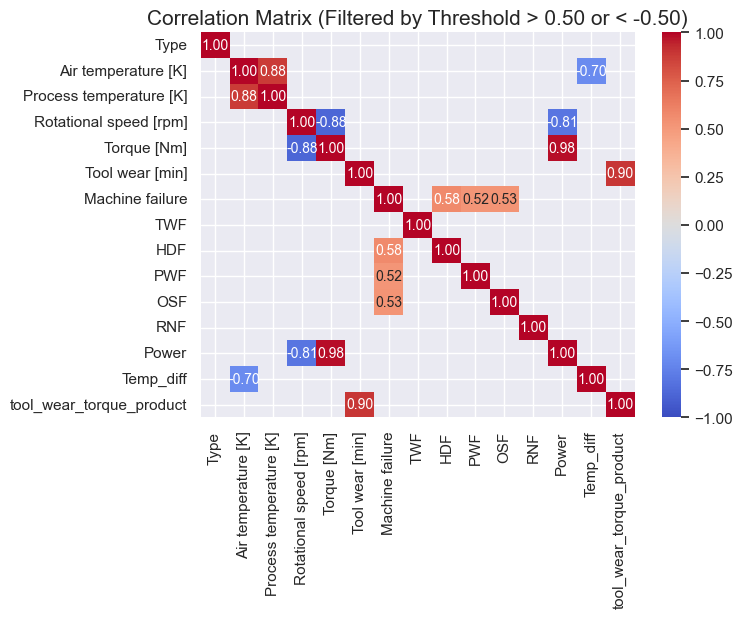

In [24]:
corr_df = df.corr()

# Creating a mask for values that are between -0.50 and 0.50
mask = np.abs(corr_df) < 0.50
plt.figure(figsize=(7, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1, center=0, annot_kws={"size": 10}, fmt=".2f")
plt.title('Correlation Matrix (Filtered by Threshold > 0.50 or < -0.50)', size=15)
plt.show()

### Checking Outliers 

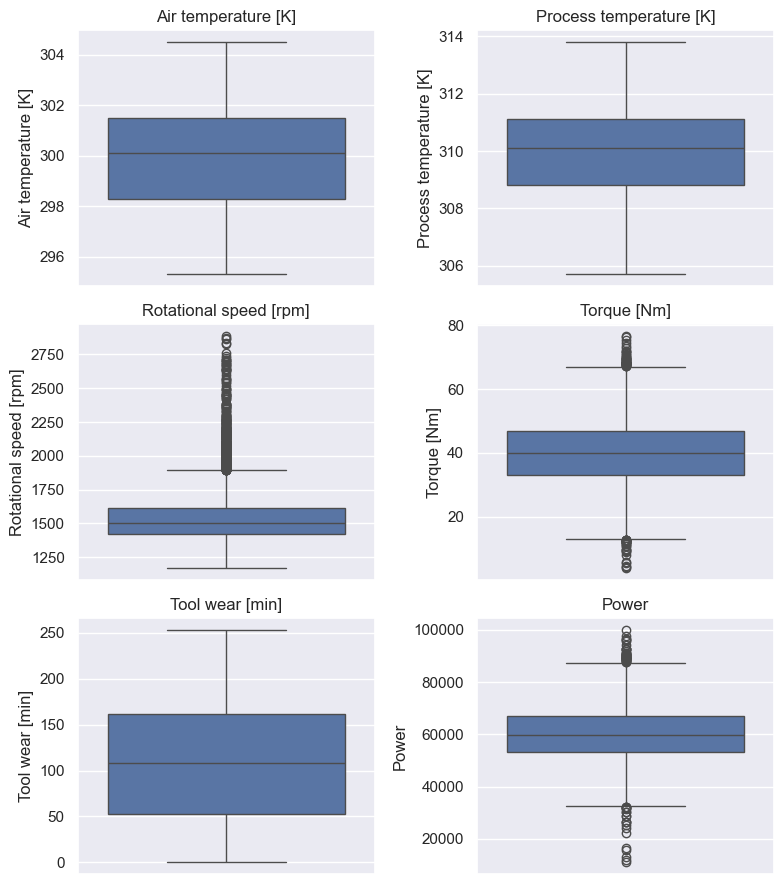

In [25]:
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
           'Torque [Nm]', 'Tool wear [min]', 'Power']

n_rows = 3
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 9))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [26]:
z_scores = stats.zscore(df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
                            'Torque [Nm]', 'Tool wear [min]']])

# Setting a threshold (commonly 3) for identifying outliers
outliers = (abs(z_scores) > 3).sum(axis=0)
print("Outliers in each column: ", outliers)

Outliers in each column:  Air temperature [K]          0
Process temperature [K]      0
Rotational speed [rpm]     164
Torque [Nm]                 25
Tool wear [min]              0
dtype: int64


* Outliers may sometimes represent important variations in the data, especially in fields like predictive maintenance. So I keep the outliers.

#### Checking the Distribution of Data (Q-Q Plots):
+ Q-Q (Quantile-Quantile) plot is a graphical method for comparing the distribution of a dataset to a theoretical distribution (such as a normal distribution) by plotting their quantiles against each other.
+ It's commonly used to check if your data follows a normal distribution.
+ If the data is normally distributed, the points will fall approximately along the straight line.
+ Deviations from the line suggest that the data is not normally distributed.

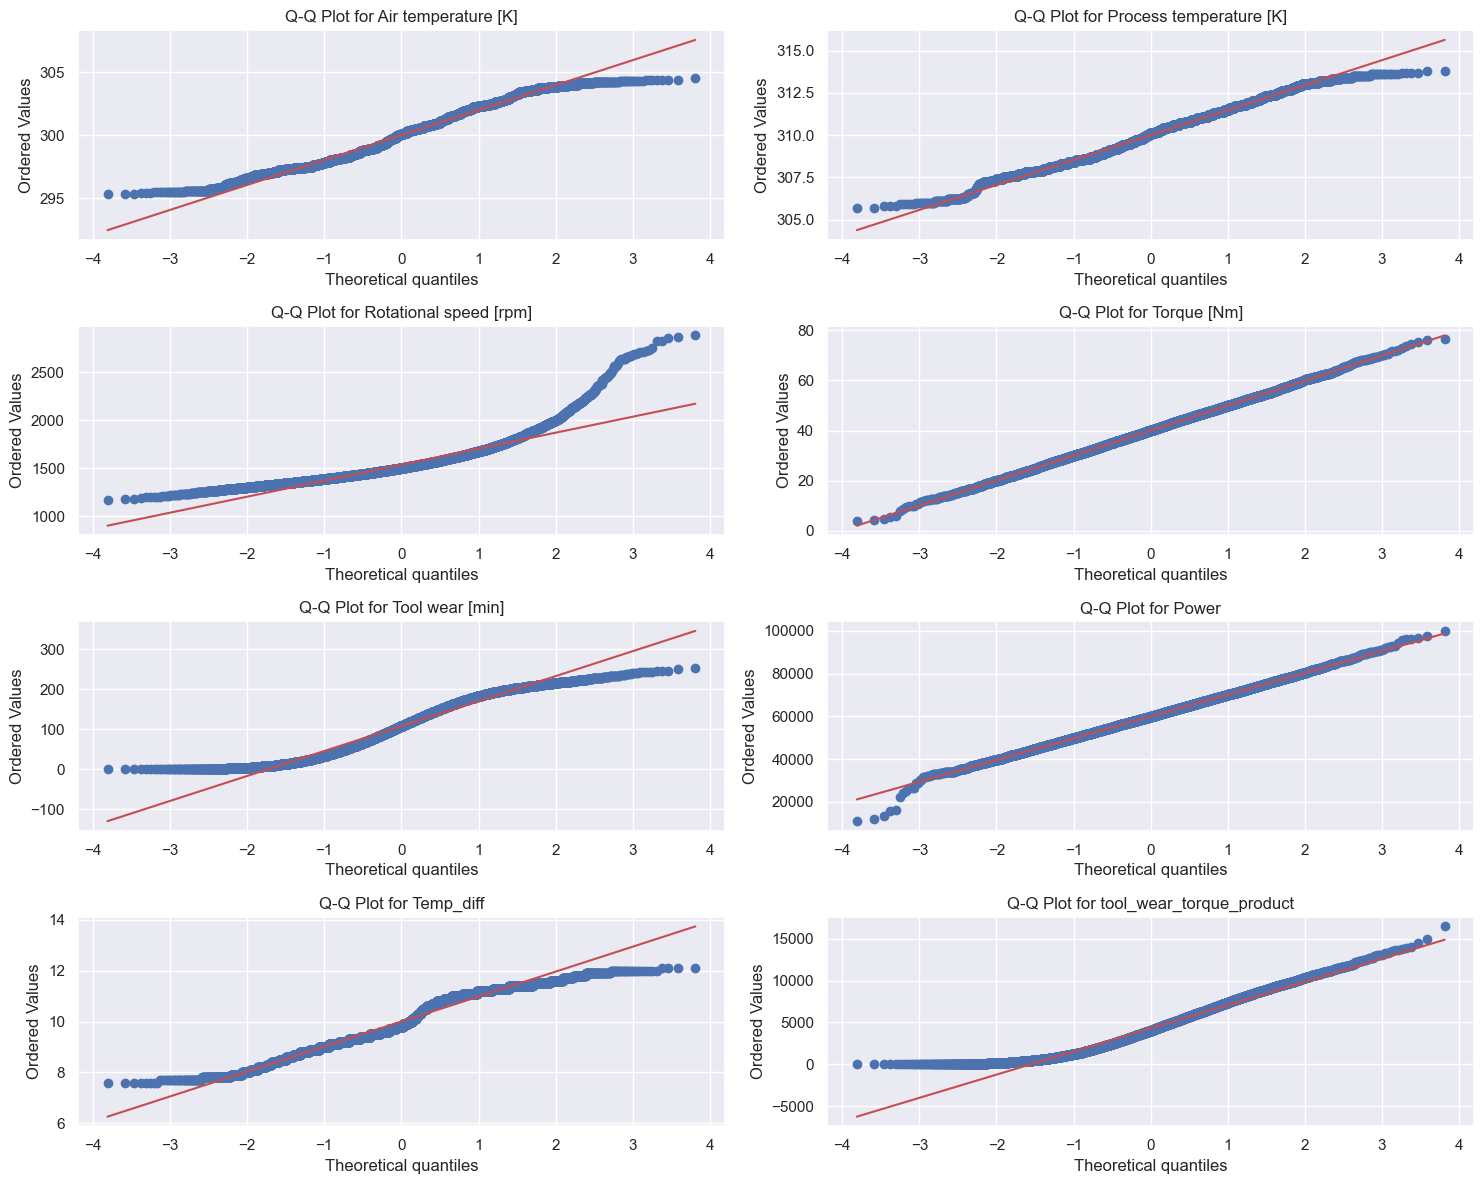

In [27]:
columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
           'Torque [Nm]', 'Tool wear [min]', 'Power', 'Temp_diff', 'tool_wear_torque_product']

n_rows = 4
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

# Plotting Q-Q plot for each feature in a separate subplot
for i, col in enumerate(columns):
    data = df[col]
    stats.probplot(data, dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

#### Data is Normally Distributed

In [28]:
df.to_csv('featured_engineered_df.csv', index=False)

#### Transformation

### Standardization (Z-score Normalization):

+ Data follows a Gaussian (normal) distribution.
+ Z-score normalization, also known as standardization, is a technique used to scale the values of a dataset so that they have a mean of 0 and a standard deviation of 1.

In [29]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Power',
       'Temp_diff', 'tool_wear_torque_product'],
      dtype='object')

In [30]:
exclude_cols = ['Type', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
# Selecting only the columns to standardize
columns_to_standardize = ['Air temperature [K]', 'Process temperature [K]', 
                          'Rotational speed [rpm]', 'Torque [Nm]', 
                          'Tool wear [min]', 'Power', 'Temp_diff', 
                          'tool_wear_torque_product']

# Fit and transform
df_standardized = df.copy()  #copy of the original DataFrame
df_standardized[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [33]:
df_standardized.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1            -0.952389                -0.947360                0.068185   
1     0            -0.902393                -0.879959               -0.729472   
2     0            -0.952389                -1.014761               -0.227450   
3     0            -0.902393                -0.947360               -0.590021   
4     0            -0.902393                -0.879959               -0.729472   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  \
0     0.282200        -1.695984                0    0    0    0    0    0   
1     0.633308        -1.648852                0    0    0    0    0    0   
2     0.944290        -1.617430                0    0    0    0    0    0   
3    -0.048845        -1.586009                0    0    0    0    0    0   
4     0.001313        -1.554588                0    0    0    0    0    0   

      Power  Temp_diff  tool_wear_torque_product  
0  0.629443   0.498849                 -1.526544  
1  0.512456   0.498849                 -1.477401  
2  1.376889   0.398954                 -1.439155  
3 -0.330009   0.398954                 -1.428717  
4 -0.357824   0.498849                 -1.399175

In [34]:
df_standardized.to_csv('preprocessed_df.csv')

In [35]:
import pickle

In [36]:
pickle.dump(scaler, open('Saved_Models/scaler.pkl', 'wb'))